In [1]:
import pandas as pd
from sklearn import preprocessing
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt

In [24]:
xfull=pd.read_csv("./BIKED_processed.csv", index_col=0)

In [26]:
collist=[]
collist.append("BB textfield")
collist.append("Seat tube length")
collist.append("Stack")
collist.append("Seat angle")
collist.append("CS textfield")
collist.append("FCD textfield")
collist.append("Head angle")
collist.append("Saddle height")
collist.append("Head tube length textfield")
collist.append("Wheel diameter front")
collist.append("Wheel diameter rear")
collist.append("Saddle length")
collist.append("Number of cogs")
collist.append("Number of chainrings")
x=xfull[collist]

In [27]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x.values)
x_scaled = pd.DataFrame(x_scaled, columns=x.columns,index=x.index.values).astype('float32')

In [28]:
images=[]
for i in x.index.values:
    filePath="./Resized_Images/" + str(i) + ".png"
    image=np.asarray(Image.open(filePath).convert('L'))
    images.append(image/255)

In [29]:
param_train, param_val, image_train, image_val = train_test_split(x_scaled, images, test_size=0.2, random_state=42)
image_train=tf.cast(tf.expand_dims(image_train, -1), tf.float32)
image_val=tf.cast(tf.expand_dims(image_val, -1), tf.float32)


In [30]:
def create_cnn(imdims, ydims):
    model=tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=imdims))
    
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2, 2),name="e1"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.ReLU())
    model.add(tf.keras.layers.Dropout(0.3))

    model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, strides=(5, 5),name="e2"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.ReLU())
    model.add(tf.keras.layers.Dropout(0.3))

    model.add(tf.keras.layers.Flatten())
    
    model.add(tf.keras.layers.Dense(200, name="e3"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.ReLU())
    model.add(tf.keras.layers.Dropout(0.3))
    
    model.add(tf.keras.layers.Dense(ydims, name="e5"))
    return model

In [31]:
dim_x=np.shape(image_train[1])
dim_y=len(param_train.columns)
cnn=create_cnn(dim_x, dim_y)
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss=tf.keras.metrics.mean_squared_error,)

In [32]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
history = cnn.fit(x=image_train, y=param_train, epochs=1000, batch_size=100, validation_data=(image_val, param_val), callbacks=[callback])

Epoch 1/1000
37/37 [==============================] - 1s 27ms/step - loss: 1.0216 - val_loss: 0.1674
Epoch 2/1000
37/37 [==============================] - 1s 23ms/step - loss: 0.6953 - val_loss: 0.1178
Epoch 3/1000
37/37 [==============================] - 1s 23ms/step - loss: 0.5217 - val_loss: 0.1071
Epoch 4/1000
37/37 [==============================] - 1s 24ms/step - loss: 0.4369 - val_loss: 0.0911
Epoch 5/1000
37/37 [==============================] - 1s 24ms/step - loss: 0.3794 - val_loss: 0.0759
Epoch 6/1000
37/37 [==============================] - 1s 24ms/step - loss: 0.3392 - val_loss: 0.0658
Epoch 7/1000
37/37 [==============================] - 1s 24ms/step - loss: 0.3062 - val_loss: 0.0537
Epoch 8/1000
37/37 [==============================] - 1s 24ms/step - loss: 0.2772 - val_loss: 0.0510
Epoch 9/1000
37/37 [==============================] - 1s 24ms/step - loss: 0.2581 - val_loss: 0.0449
Epoch 10/1000
37/37 [==============================] - 1s 23ms/step - loss: 0.2398 - val_lo

37/37 [==============================] - 1s 23ms/step - loss: 0.0288 - val_loss: 0.0103
Epoch 82/1000
37/37 [==============================] - 1s 23ms/step - loss: 0.0288 - val_loss: 0.0106
Epoch 83/1000
37/37 [==============================] - 1s 23ms/step - loss: 0.0284 - val_loss: 0.0104
Epoch 84/1000
37/37 [==============================] - 1s 23ms/step - loss: 0.0274 - val_loss: 0.0097
Epoch 85/1000
37/37 [==============================] - 1s 23ms/step - loss: 0.0275 - val_loss: 0.0100
Epoch 86/1000
37/37 [==============================] - 1s 23ms/step - loss: 0.0274 - val_loss: 0.0106
Epoch 87/1000
37/37 [==============================] - 1s 23ms/step - loss: 0.0261 - val_loss: 0.0099
Epoch 88/1000
37/37 [==============================] - 1s 23ms/step - loss: 0.0254 - val_loss: 0.0097
Epoch 89/1000
37/37 [==============================] - 1s 23ms/step - loss: 0.0248 - val_loss: 0.0094
Epoch 90/1000
37/37 [==============================] - 1s 23ms/step - loss: 0.0237 - val_loss: 0

Epoch 161/1000
37/37 [==============================] - 1s 23ms/step - loss: 0.0094 - val_loss: 0.0081
Epoch 162/1000
37/37 [==============================] - 1s 23ms/step - loss: 0.0093 - val_loss: 0.0078
Epoch 163/1000
37/37 [==============================] - 1s 23ms/step - loss: 0.0095 - val_loss: 0.0078
Epoch 164/1000
37/37 [==============================] - 1s 23ms/step - loss: 0.0091 - val_loss: 0.0081
Epoch 165/1000
37/37 [==============================] - 1s 23ms/step - loss: 0.0086 - val_loss: 0.0076
Epoch 166/1000
37/37 [==============================] - 1s 23ms/step - loss: 0.0088 - val_loss: 0.0076
Epoch 167/1000
37/37 [==============================] - 1s 23ms/step - loss: 0.0084 - val_loss: 0.0075
Epoch 168/1000
37/37 [==============================] - 1s 23ms/step - loss: 0.0081 - val_loss: 0.0077
Epoch 169/1000
37/37 [==============================] - 1s 23ms/step - loss: 0.0084 - val_loss: 0.0080
Epoch 170/1000
37/37 [==============================] - 1s 23ms/step - lo

In [33]:
preds=cnn.predict(image_val)

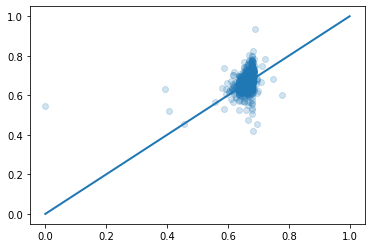

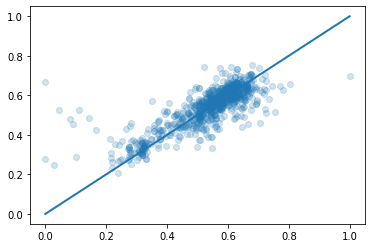

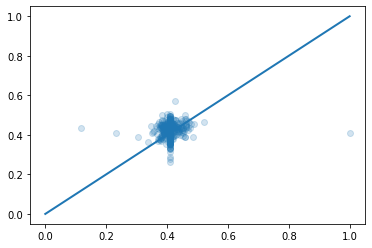

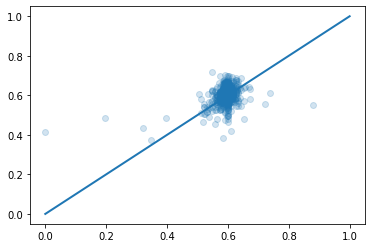

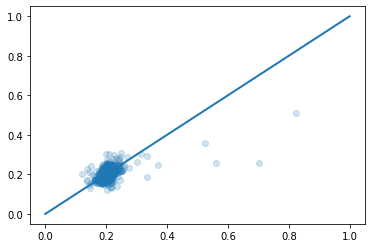

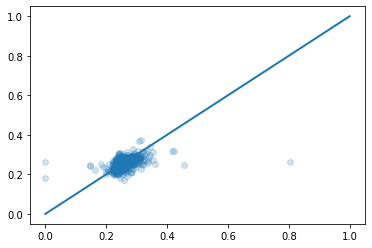

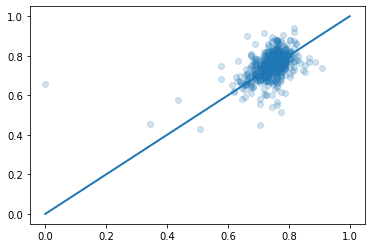

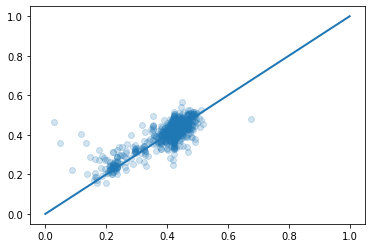

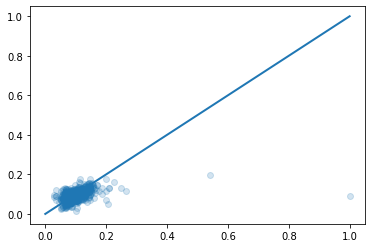

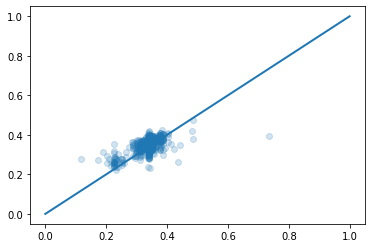

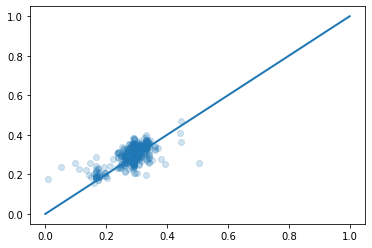

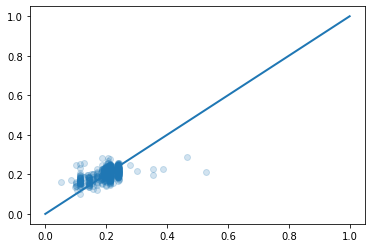

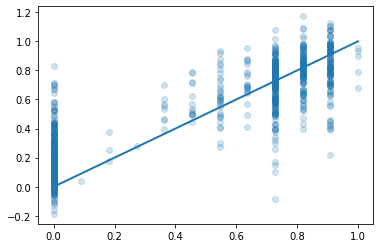

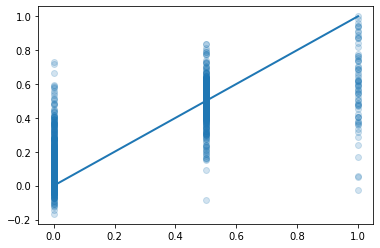

In [41]:
indexlist=list(range(len(x.columns)))
for i in indexlist:
    plt.scatter(param_val.values[:,i], preds[:,i], alpha=0.2)
    plt.plot([0,1], [0,1], linewidth=2)
    plt.show()